## importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importing the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
x = df.iloc[:,[2,3]].values
y = df.iloc[:, -1].values
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## splitting the dataset into the training set nd test set 

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Training the svm model on the training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

## pridicting the test set result 

In [6]:
y_pred=classifier.predict(x_test)

## Making the confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


## Visualising the training set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


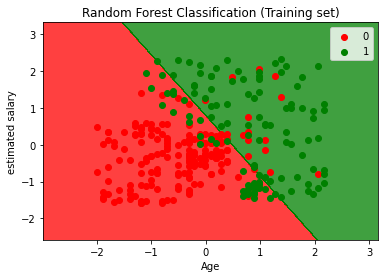

In [8]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train
x1, x2= np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max()+1, step=0.01)) 
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max()) 
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(("red", "green"))(i), label= j)
plt.title('Random Forest Classification (Training set)') 
plt.xlabel("Age")

plt.ylabel("estimated salary")

plt.legend() 
plt.show()